In [17]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

1
[[5.3763820e-11 9.5629561e-01 3.5581294e-07 8.5877234e-09 1.7386070e-02
  1.8103006e-03 2.4386302e-02 6.0469974e-05 6.0832233e-05 4.6881404e-10]]


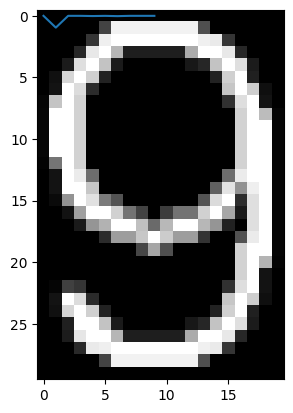

In [19]:
W = tf.Variable(np.load("../W.npy"))
V = tf.Variable(np.load("../V.npy"))

b1 = tf.Variable(np.load("../b1.npy"))
b2 = tf.Variable(np.load("../b2.npy"))
image = cv2.imread("5,6.png")
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)


training_sample = tf.Variable(binary_image.flatten().astype(np.float32))
training_sample = tf.reshape(training_sample, [1, -1])
h = tf.nn.sigmoid(tf.matmul(training_sample, W) + b1)
logits = tf.matmul(h, V) + b2
y = tf.nn.softmax(logits)
res = y.numpy()[0].argmax()
print(res)
print(y.numpy())
plt.plot(y.numpy()[0])